# Retail Customer Segmentation and Churn Prediction

- The goal of the study is to propose a combination of RFM analysis and machine learning algorithms for customer segmentation and churn prediction based on mainly retail transactional data.

## Data Collection

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('file_out2.csv')

In [4]:
df.head(3)

,Unnamed: 0,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,1,329,2019-12-27,524,355.932203,64.067797,185,2
2,2,330,2019-12-27,192,901.694915,162.305085,230,4


In [5]:
df.shape

(29103, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29103 non-null  int64  
 1   InvoiceID   29103 non-null  int64  
 2   Date        29103 non-null  object 
 3   ProductID   29103 non-null  int64  
 4   TotalSales  29103 non-null  float64
 5   Discount    29103 non-null  float64
 6   CustomerID  29103 non-null  int64  
 7   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [7]:
categorical_variables = ['Unnamed: 0', 'InvoiceID', 'ProductID', 'CustomerID']

for i in categorical_variables:
    df[i] = df[i].astype(object)

In [8]:
df.describe()

,TotalSales,Discount,Quantity
count,29103.000000,29103.000000,29103.000000
mean,2552.679147,451.325294,5.440367
std,4568.256400,650.359457,6.804637
min,0.000000,-0.004694,0.000000
25%,779.661017,137.288136,2.000000
50%,1366.101695,244.067797,4.000000
75%,2847.457627,508.658644,4.000000
max,332574.460000,14110.169492,250.000000


In [9]:
df.nunique()

Unnamed: 0    29103
InvoiceID     14079
Date           1268
ProductID      1940
TotalSales     7013
Discount       6797
CustomerID      507
Quantity         59
dtype: int64

## Data Cleaning

In [10]:
# dropping unwanted feature variable
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [11]:
# checking for redundancy
df.duplicated().sum()

293

In [12]:
# dropping redundancy
df.drop_duplicates(keep= 'first', inplace= True) 

In [13]:
# chceking for null values
df.isnull().sum()

InvoiceID     0
Date          0
ProductID     0
TotalSales    0
Discount      0
CustomerID    0
Quantity      0
dtype: int64

In [14]:
# checking whether TotalSales and Quantity having zeros in it
(df[['TotalSales', 'Quantity']] == 0).sum()

TotalSales    176
Quantity      158
dtype: int64

In [15]:
# getting TotalSales and Quantity having zeros
df[(df.TotalSales == 0) & (df.Quantity == 0)]

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
2328,1930,2019-10-05,885,0.0,0.0,17,0
6533,4718,2019-04-13,751,0.0,0.0,404,0
8706,289,2019-03-23,1830,0.0,0.0,430,0
8707,291,2019-10-21,224,0.0,0.0,276,0
8708,262,2019-11-18,925,0.0,0.0,364,0
...,...,...,...,...,...,...,...
28893,196,2023-02-15,900,0.0,0.0,230,0
28894,197,2023-02-16,795,0.0,0.0,230,0
28895,198,2023-02-18,628,0.0,0.0,230,0
28896,198,2023-02-18,900,0.0,0.0,230,0


In [16]:
# getting only TotalSales having zeros
df[(df.TotalSales == 0) & (df.Quantity != 0)]

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
8663,242,2019-01-15,1790,0.0,0.0,122,4
8665,244,2019-02-15,1470,0.0,0.0,129,4
8667,246,2019-02-28,1499,0.0,0.0,129,4
8673,253,2019-04-29,1592,0.0,0.0,117,4
8685,242,2019-02-11,1790,0.0,0.0,122,4
8687,244,2019-02-19,1470,0.0,0.0,129,4
8688,245,2019-03-11,1246,0.0,0.0,122,4
8689,246,2019-03-07,1499,0.0,0.0,129,4
8696,253,2019-05-02,1592,0.0,0.0,117,4
8697,254,2019-05-04,1826,0.0,0.0,122,4


In [17]:
# getting unique ProductID
unique_product_id = df['ProductID'].unique()
unique_product_id

array([1684, 524, 192, ..., 1201, 1261, 371], dtype=object)

In [18]:
# calculating each products average unit price and its mode quantity

list_unit_price = [] # empty list to store avg unit price
list_qty = [] # empty list to store mode qty

for i in unique_product_id:
    temp_df = df[df.ProductID == i] # temp dataframe to store each product data
    
    temp_unit_price = temp_df['TotalSales'].sum() / temp_df['Quantity'].sum() # calculating avg unit price of particular product
    list_unit_price.append(temp_unit_price) # appending to list_unit_price
    
    temp_qty = round(temp_df['Quantity'].mode().iloc[0]) # calculating mode quantity of the particular product
    list_qty.append(temp_qty) # appending to list_qty

In [19]:
# creating a dataframe that have ProductID with its Avg_Unit_Price and Mode_Quantity

product_dict = {'ProductID' : unique_product_id, 'Avg_Unit_Price' : list_unit_price, 'Mode_Quantity' : list_qty} # columns

product_df = pd.DataFrame(data = product_dict) # creating dataframe
product_df.head()

,ProductID,Avg_Unit_Price,Mode_Quantity
0,1684,198.349619,4
1,524,209.738909,4
2,192,301.046441,4
3,218,225.840083,4
4,247,234.053428,4


In [20]:
# creating a temp dataframe that have TotalSales zero from orginal dataset
df_temp = df[df['TotalSales'] == 0]
df_temp.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
2328,1930,2019-10-05,885,0.0,0.0,17,0
6533,4718,2019-04-13,751,0.0,0.0,404,0
8663,242,2019-01-15,1790,0.0,0.0,122,4
8665,244,2019-02-15,1470,0.0,0.0,129,4
8667,246,2019-02-28,1499,0.0,0.0,129,4


In [21]:
# replacing the zeros of TotalSales with Avg_Unit_Price and zeros of Quantity with Mode_Quantity of the particular product

k = 0
for i in product_df['ProductID']: # getting ProductID from product_df

    for j in df_temp.index: # getting index number from df_temp

        if df_temp['ProductID'][j] == i and df_temp['Quantity'][j] == 0: # validating condition
            
            df_temp['Quantity'][j] = product_df['Mode_Quantity'][k] # updating quantity
            df_temp['TotalSales'][j] = product_df['Avg_Unit_Price'][k] * product_df['Mode_Quantity'][k] # updating totalsales
            
        elif df_temp['ProductID'][j] == i and df_temp['Quantity'][j] != 0: # validating condition
            
            df_temp['TotalSales'][j] = product_df['Avg_Unit_Price'][k] * df_temp['Quantity'][j] # updating totalsales
            
        else:
            pass
            
    k+=1

In [22]:
# viewing the updated temp dataframe
df_temp.tail()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
28893,196,2023-02-15,900,3933.123257,0.0,230,4
28894,197,2023-02-16,795,2081.267598,0.0,230,2
28895,198,2023-02-18,628,2832.718468,0.0,230,4
28896,198,2023-02-18,900,3933.123257,0.0,230,4
28897,198,2023-02-18,1285,3225.687382,0.0,230,2


In [23]:
# updating the records of orginal dataset with temp dataset
df.update(df_temp)
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [24]:
# changing the datatype of Quantity from float to int
df['Quantity'] = df['Quantity'].astype('int64')

In [25]:
# checking again after updating whether TotalSales and Quantity having any zeros in it
(df[['TotalSales', 'Quantity']] == 0).sum()

TotalSales    16
Quantity      16
dtype: int64

- data still having 16 records with TotalSales and Quantity zero, this is due to the particular products mode quantity is zero.

In [26]:
# dropping the records that still have TotalSales and Quantity zero

drop_list = list(df[df['TotalSales'] == 0].index) # getting the index of those records 
df.drop(drop_list, inplace= True) # dropping

## Data Exploration

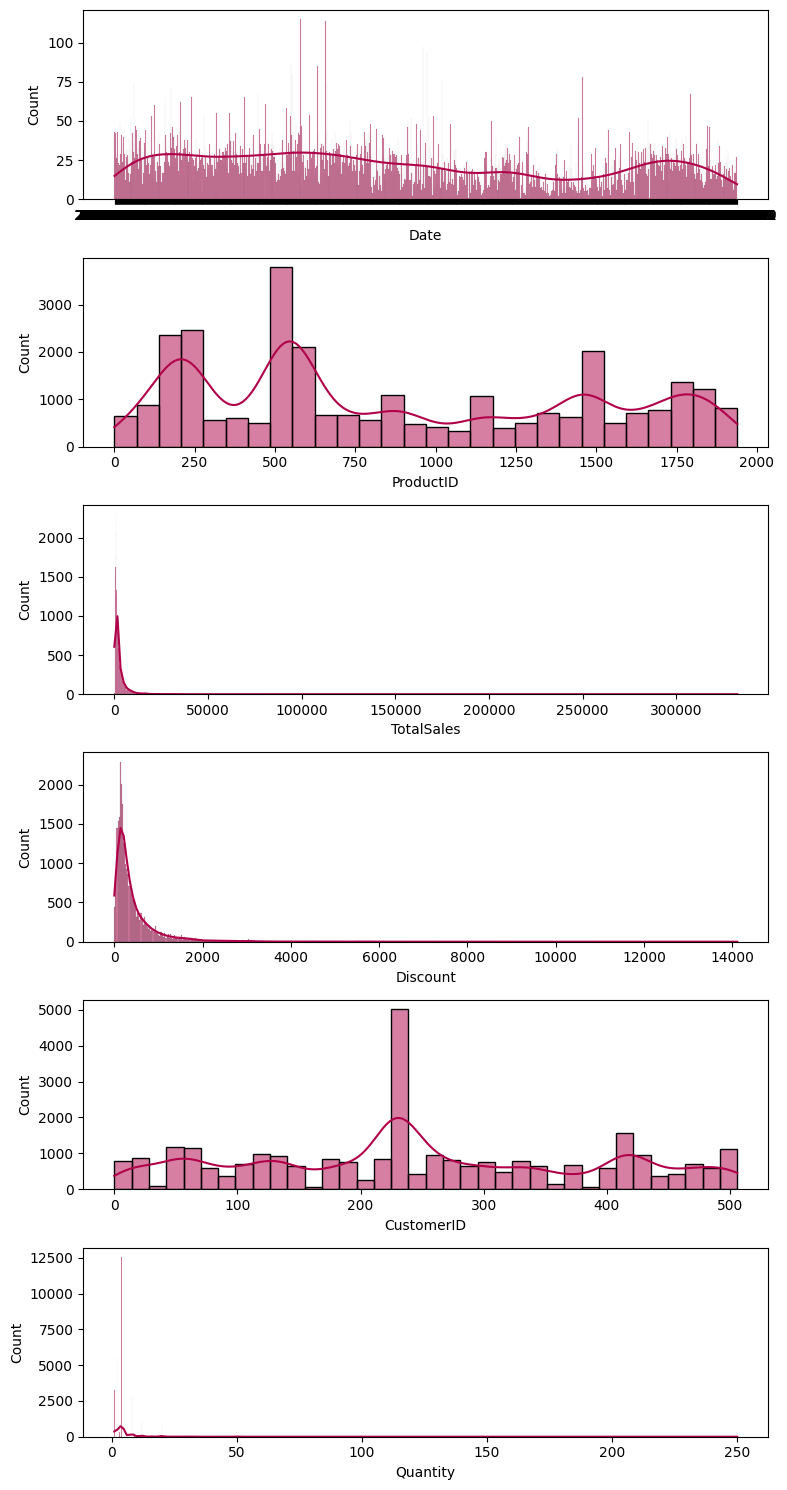

In [27]:
# visualizing the distribution of feature variables with histplot
fig, axis = plt.subplots(6,1, figsize= (8,15))

for i,feature in enumerate(['Date', 'ProductID', 'TotalSales', 'Discount', 'CustomerID', 'Quantity']):
    sns.histplot(x= feature, data= df, kde= True, ax= axis[i], color= '#b00149')

plt.tight_layout()
plt.show()

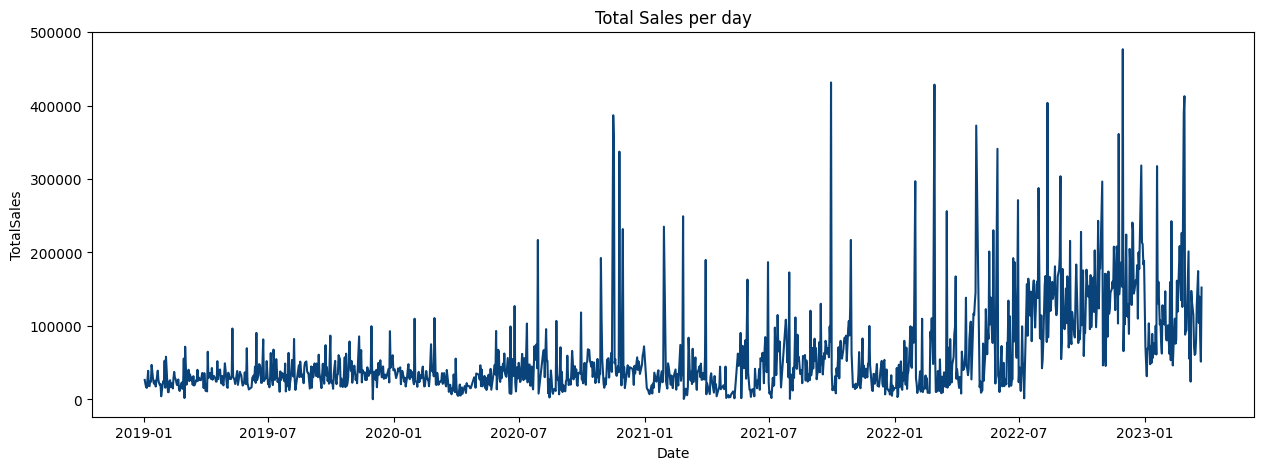

In [32]:
# visualizing total sales perday using lineplot
sales_perday = df.groupby('Date')['TotalSales'].sum().sort_values(ascending= False).to_frame().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Date', y= 'TotalSales', data= sales_perday, color= '#0a437a')
plt.title('Total Sales per day')
plt.show()

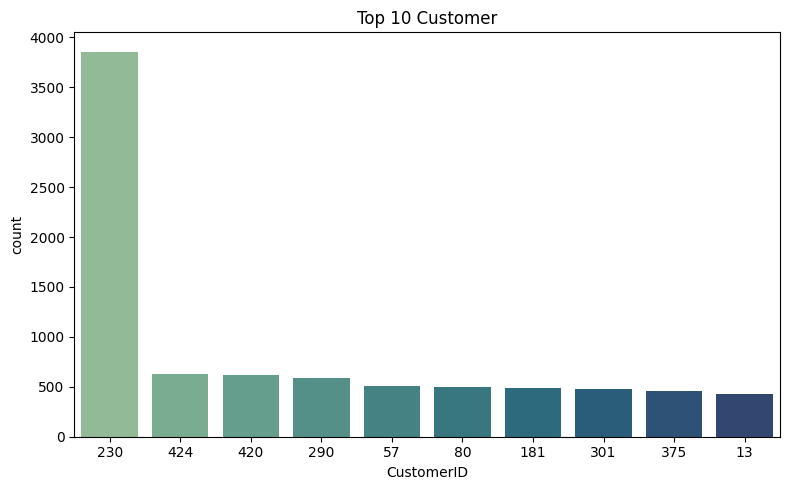

In [33]:
# visualizing top 10 frequent customer using countplot
top10_customer = df['CustomerID'].value_counts().head(10).index

plt.figure(figsize= (8,5))
sns.countplot(x= 'CustomerID', data= df, order= top10_customer,  palette= 'crest')
plt.title('Top 10 Customer')
plt.tight_layout()
plt.show()

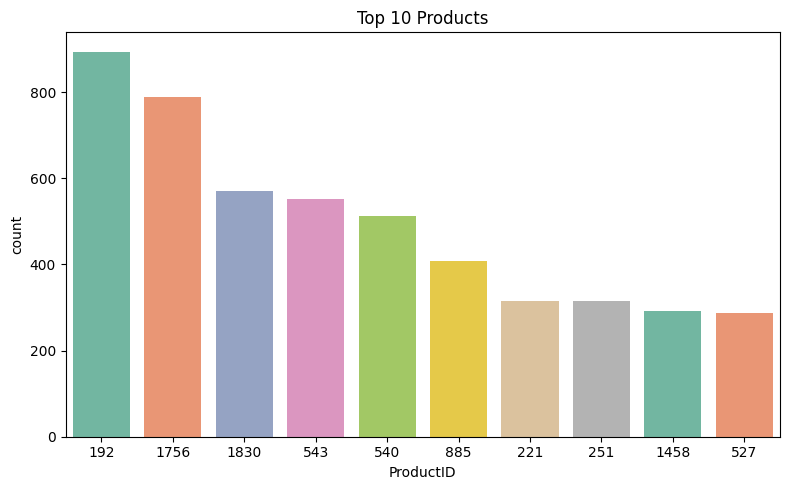

In [34]:
# visualizing top 10 products that sold using countplot
top10_product = df['ProductID'].value_counts().head(10).index

plt.figure(figsize= (8,5))
sns.countplot(x= 'ProductID', data= df, order= top10_product,  palette= "Set2")
plt.title('Top 10 Products')
plt.tight_layout()
plt.show()

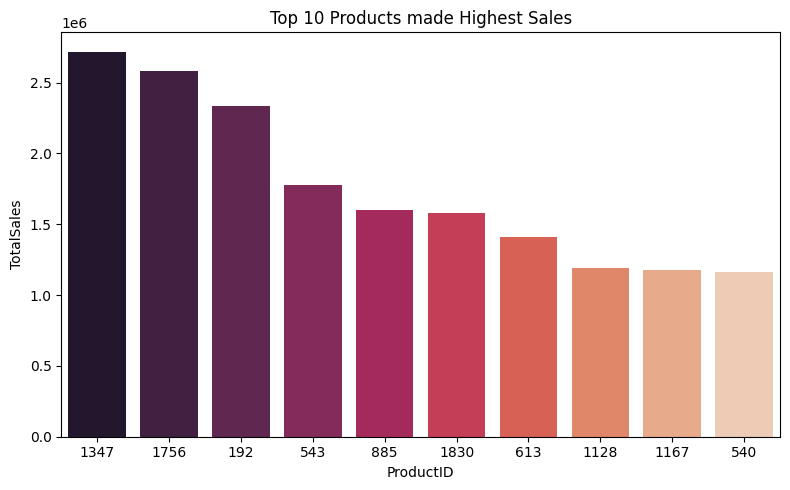

In [35]:
# visualizing top 10 products that made high revenue using barplot
top10_sales = df.groupby('ProductID')['TotalSales'].sum().sort_values(ascending= False).head(10).to_frame().reset_index()
top10_sales_index = list(top10_sales['ProductID'])

plt.figure(figsize= (8,5))
sns.barplot(x= 'ProductID', y= 'TotalSales', data= top10_sales, order= top10_sales_index,  palette= 'rocket')
plt.title('Top 10 Products made Highest Sales')
plt.tight_layout()
plt.show()

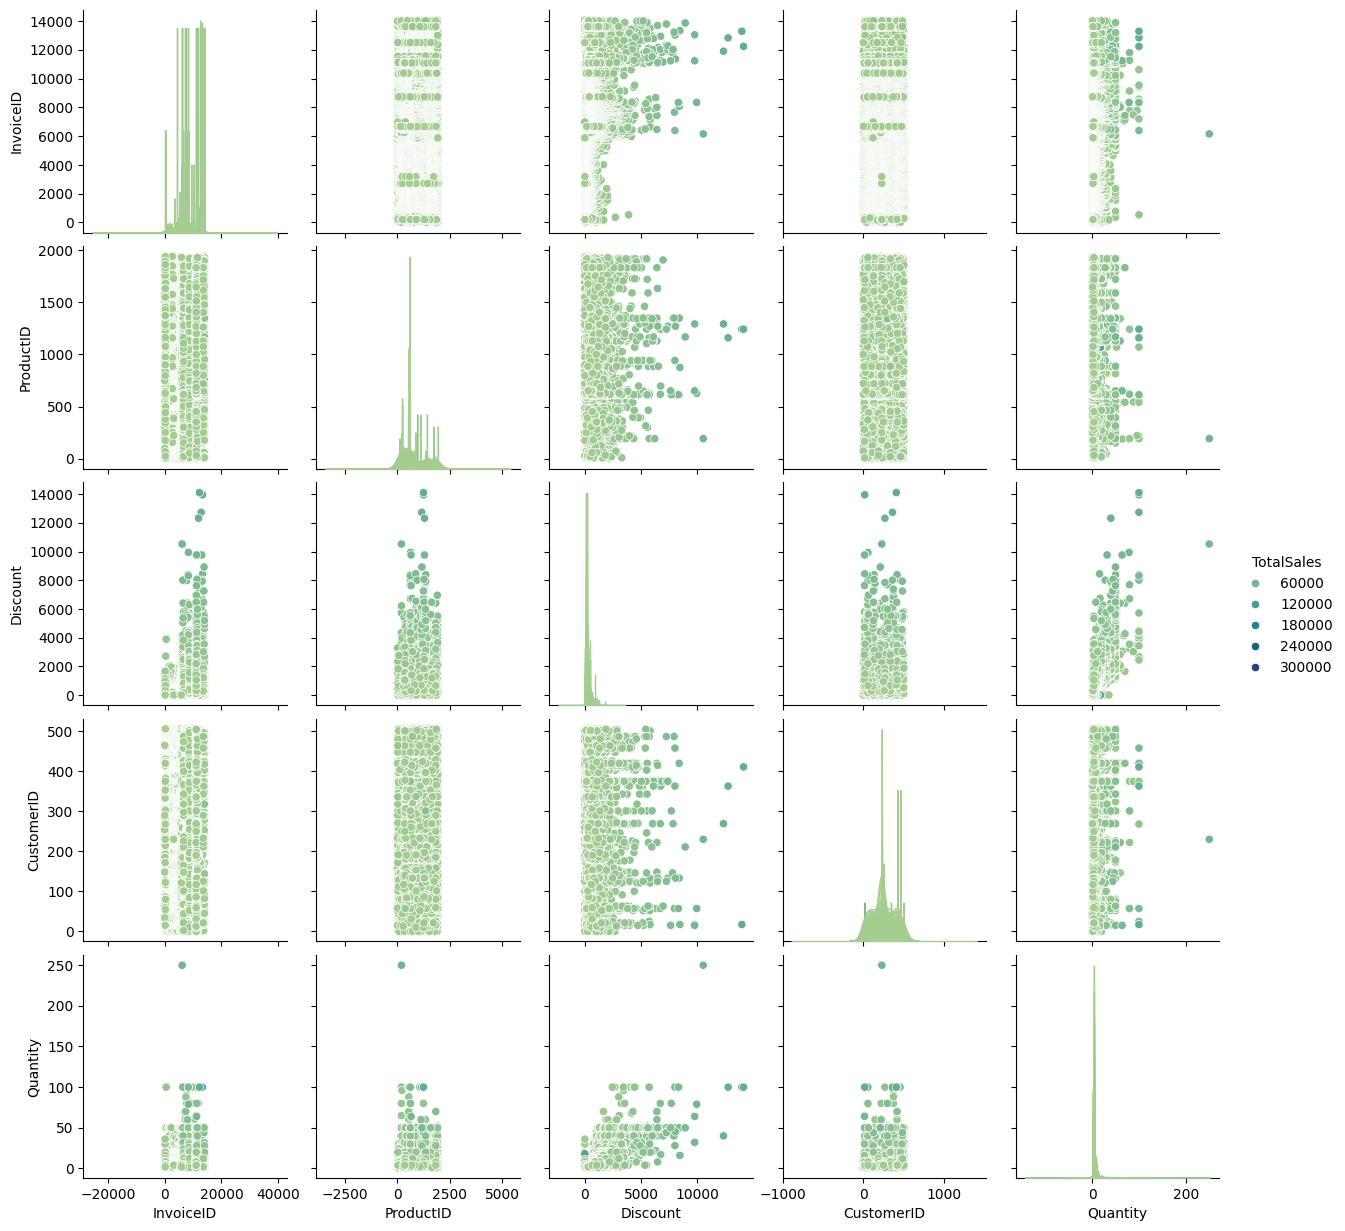

In [36]:
# understanding the relationship between each feature variables using pairplot
sns.pairplot(data= df, hue= 'TotalSales', palette= 'crest')
plt.show()

## First Part of Data

- Splitting the whole dataset into two parts.
    - first part without last 3 months of transactions
    - second part with only last 3 months of transactions

In [37]:
# getting the latest invoice date in the dataset
latest_invoice_date = df['Date'].max()
latest_invoice_date

Timestamp('2023-03-25 00:00:00')

In [38]:
# invoice date before three months of latest date
mon3_ret_date = pd.Timestamp('2023-01-01 00:00:00')
mon3_ret_date

Timestamp('2023-01-01 00:00:00')

In [40]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a copy of the DataFrame and set 'Date' as index
df_part1 = df.copy()
df_part1.set_index('Date', inplace=True)

# Sort the index to ensure chronological order
df_part1 = df_part1.sort_index()

# Slice the data to exclude the last 3 months (up to '2023-01-01')
df_part1 = df_part1.loc[:'2023-01-01']


In [41]:
# reseting the index
df_part1.reset_index(inplace= True)

In [42]:
# viewing the data of df_part1
df_part1.head()

,Date,InvoiceID,ProductID,TotalSales,Discount,CustomerID,Quantity
0,2019-01-02,2661,901,621.533898,111.876102,189,1
1,2019-01-02,2670,1344,237.254237,42.705763,230,1
2,2019-01-02,2671,192,2000.000000,360.000000,375,8
3,2019-01-02,2671,192,1000.000000,180.000000,375,4
4,2019-01-02,2671,248,1830.508475,329.491525,375,8


## RFM Analysis

In [43]:
# knowing the number of customers in df_part1
df_part1['CustomerID'].nunique()

484

In [44]:
# getting the latest transaction date in df_part1
df_part1_latest_date = df_part1['Date'].max()
df_part1_latest_date

Timestamp('2022-12-31 00:00:00')

In [45]:
# calculating the recency of each customer

recency = df_part1.groupby('CustomerID').agg({'Date': lambda x : (df_part1_latest_date - x.max()).days}).reset_index() # calculating recency

recency.rename(columns= {'Date':'Recency'}, inplace= True) # renaming columns
recency

,CustomerID,Recency
0,0,15
1,1,651
2,2,113
3,3,541
4,4,8
...,...,...
479,502,28
480,503,145
481,504,47
482,505,14


In [46]:
# calculating the frequency of each customer

frequency = df_part1.groupby('CustomerID').agg({'CustomerID':'count'}) # calculating frequency

frequency.rename(columns= {'CustomerID':'Frequency'}, inplace= True) # renaming columns
frequency.reset_index(inplace= True) # resetting index

frequency

,CustomerID,Frequency
0,0,26
1,1,13
2,2,35
3,3,1
4,4,38
...,...,...
479,502,121
480,503,3
481,504,5
482,505,62


In [47]:
# calculating the monetary of each customer

monetary = df_part1.groupby('CustomerID').agg({'TotalSales':'sum'}).reset_index() # calculting monetary

monetary.rename(columns= {'TotalSales':'Monetary'}, inplace= True) # renaming columns
monetary

,CustomerID,Monetary
0,0,168979.569189
1,1,20476.728814
2,2,43406.084743
3,3,300.847458
4,4,60977.720337
...,...,...
479,502,242781.423723
480,503,19930.508474
481,504,16088.983050
482,505,251922.678642


In [48]:
# creating a new dataframe RFM with recency, frequency and monetary of each customer
RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,CustomerID,Recency,Frequency,Monetary
0,0,15,26,168979.569189
1,1,651,13,20476.728814
2,2,113,35,43406.084743
3,3,541,1,300.847458
4,4,8,38,60977.720337
...,...,...,...,...
479,502,28,121,242781.423723
480,503,145,3,19930.508474
481,504,47,5,16088.983050
482,505,14,62,251922.678642


In [49]:
# describing feature variables of RFM dataframe
RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,484.000000,484.000000,484.000000,4.840000e+02
mean,251.231405,467.960744,56.797521,1.373185e+05
std,146.209740,484.924190,194.117455,3.566191e+05
min,0.000000,0.000000,1.000000,2.330508e+02
25%,124.750000,22.500000,1.000000,1.864407e+03
50%,248.500000,259.000000,4.000000,1.140044e+04
75%,377.250000,887.500000,46.250000,9.504901e+04
max,506.000000,1457.000000,3745.000000,3.993667e+06


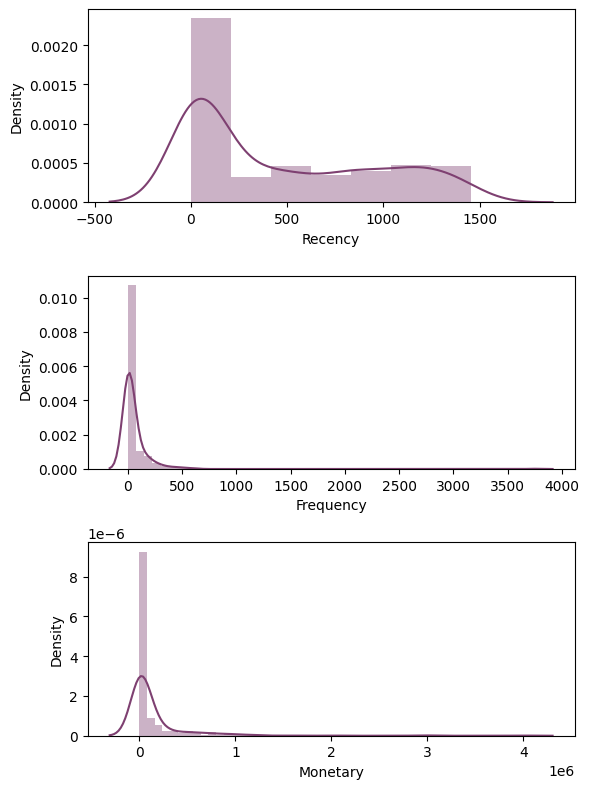

In [50]:
# visualizing the distribution of feature variables in RFM dataframe using distplot
fig, axis = plt.subplots(3,1, figsize= (6,8))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.distplot(x= RFM[feature], kde= True, ax= axis[i], color= '#7e4071', axlabel= feature)

plt.tight_layout()
plt.show()

In [51]:
# sorting the recency, frequency and monetary values of customers into bins using pd.cut() to get their respective scores

RFM['R_Score'] = pd.cut(RFM['Recency'], bins= [-1, 30, 120, 400, RFM['Recency'].max()], labels= [4,3,2,1]).astype('int64') # getting R_Score for each customer

RFM['F_Score'] = pd.cut(RFM['Frequency'], bins= [0, 5, 25, 100, RFM['Frequency'].max()], labels= [1,2,4,8]).astype('int64') # getting R_Score for each customer

RFM['M_Score'] = pd.cut(RFM['Monetary'], bins= [0, 10000, 100000, 800000, RFM['Monetary'].max()], labels= [1,3,6,10]).astype('int64') # getting R_Score for each customer

In [52]:
# concatenating the scores for each customer to get their values
RFM['RFM_Value'] = RFM.apply(lambda x: str(int(x['R_Score'])) + str(int(x['F_Score'])) + str(int(x['M_Score'])), axis=1)

In [53]:
# adding the the scores for each customer to get their overall score
RFM['RFM_Score'] = RFM['R_Score'] + RFM['F_Score'] + RFM['M_Score']
RFM

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score
0,0,15,26,168979.569189,4,4,6,446,14
1,1,651,13,20476.728814,1,2,3,123,6
2,2,113,35,43406.084743,3,4,3,343,10
3,3,541,1,300.847458,1,1,1,111,3
4,4,8,38,60977.720337,4,4,3,443,11
...,...,...,...,...,...,...,...,...,...
479,502,28,121,242781.423723,4,8,6,486,18
480,503,145,3,19930.508474,2,1,3,213,6
481,504,47,5,16088.983050,3,1,3,313,7
482,505,14,62,251922.678642,4,4,6,446,14


## K-Means Clustering

- using K-Means Clustering to find optimal cluster value for the data

In [54]:
# importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [55]:
# assigning the required independent feature variables of RFM dataframe to X_rfm variable
X_rfm = RFM[['R_Score', 'F_Score', 'M_Score', 'RFM_Value', 'RFM_Score']]

In [56]:
# standardizing the data with StandardScaler
std_scaler = StandardScaler()
X_rfm = std_scaler.fit_transform(X_rfm)

In [57]:
# building k-means clustering model and by elbow curve method finding the optimal cluster value

list_wcss = [] # empty list to store Within Cluster Sum of Square values

k = range(1,11)

for i in k:
    
    kmeans = KMeans(n_clusters= i, random_state= 42) # building k-means clustering model 
    kmeans.fit(X_rfm) # fitting data into model
    
    list_wcss.append(kmeans.inertia_) # appending WCSS value to list_wcss

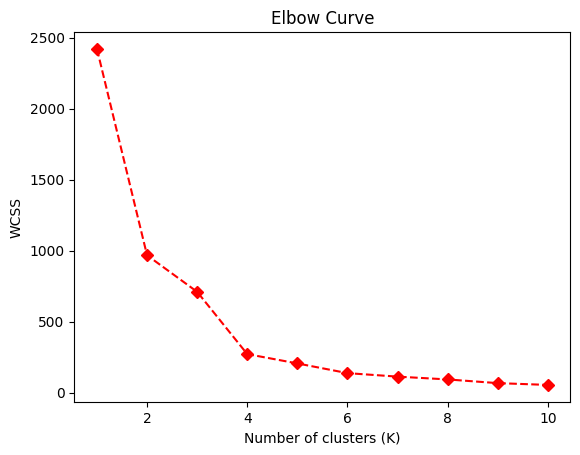

In [58]:
# ploting wcss against k to find optimal k value
plt.plot(k, list_wcss, 'rD--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

#### optimal clusters, K = 4

## Segmentation Process

In [59]:
# segmenting each customer into different segments based on their RFM scores

RFM['Seg_Num'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 10, 18, 22], labels= [4,3,2,1]) # getting Segment_Number for each customer

RFM['Segment_Label'] = pd.cut(RFM['RFM_Score'], bins= [0, 6, 10, 18, 22], labels= ['Basic Customer', 'Standard Customer',
                                       'Prime Customer', 'Elite Customer']) # getting Segment_Label for each customer

RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label
0,0,15,26,168979.569189,4,4,6,446,14,2,Prime Customer
1,1,651,13,20476.728814,1,2,3,123,6,4,Basic Customer
2,2,113,35,43406.084743,3,4,3,343,10,3,Standard Customer
3,3,541,1,300.847458,1,1,1,111,3,4,Basic Customer
4,4,8,38,60977.720337,4,4,3,443,11,2,Prime Customer


In [61]:
RFM.groupby('Segment_Label')[['Recency', 'Frequency', 'Monetary']].median().round().reset_index()

,Segment_Label,Recency,Frequency,Monetary
0,Basic Customer,810.0,1.0,2225.0
1,Standard Customer,73.0,18.0,36797.0
2,Prime Customer,8.0,118.0,231692.0
3,Elite Customer,2.0,344.0,1067671.0


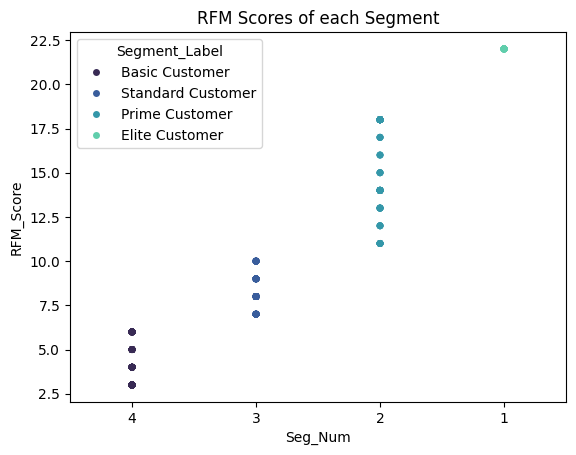

In [62]:
# visualizing the RFM Scores of different segment of customers using strip plot
sns.stripplot(x= 'Seg_Num', y= 'RFM_Score', data= RFM, hue= 'Segment_Label', palette= 'mako', jitter=False)
plt.title('RFM Scores of each Segment')
plt.show()

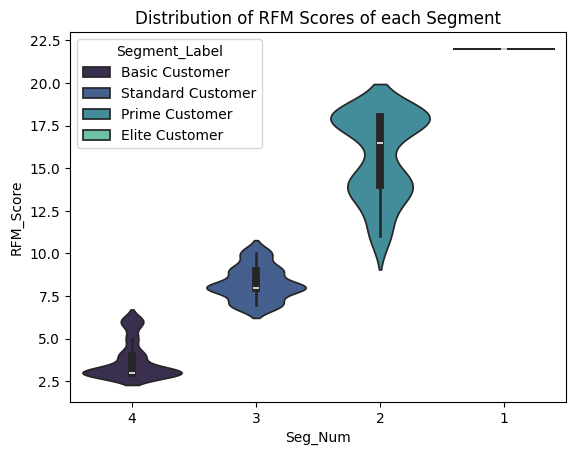

In [63]:
# visualizing the distribution of different segment of customers with their RFM score using violin plot
sns.violinplot(x= 'Seg_Num', y= 'RFM_Score', data= RFM, hue= 'Segment_Label', palette= 'mako')
plt.title('Distribution of RFM Scores of each Segment')
plt.show()

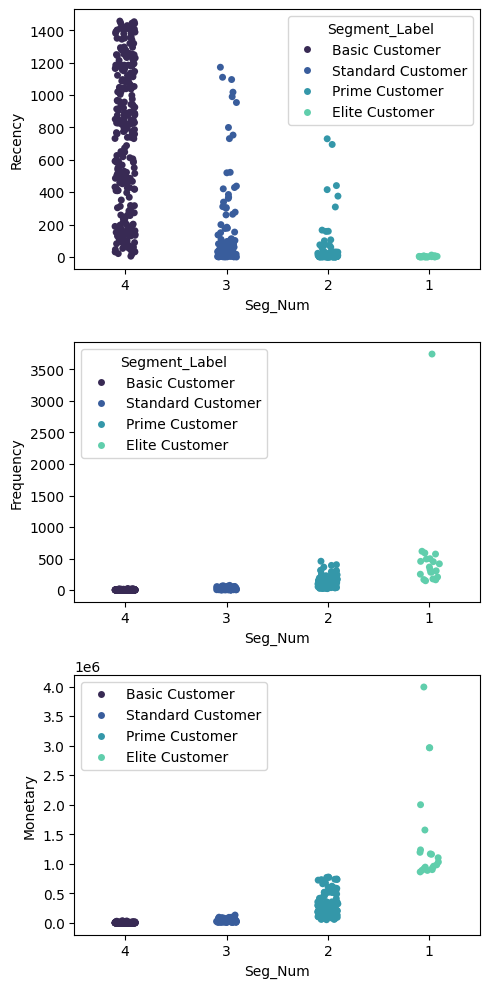

In [64]:
# visualizing the different segment of customers and thier recency, frequency and monetary values using strip plot
fig, axis = plt.subplots(3,1, figsize= (5,10))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.stripplot(x= 'Seg_Num', y= feature, data= RFM, hue= 'Segment_Label', palette= 'mako', ax= axis[i])

plt.legend()
plt.tight_layout()
plt.show()

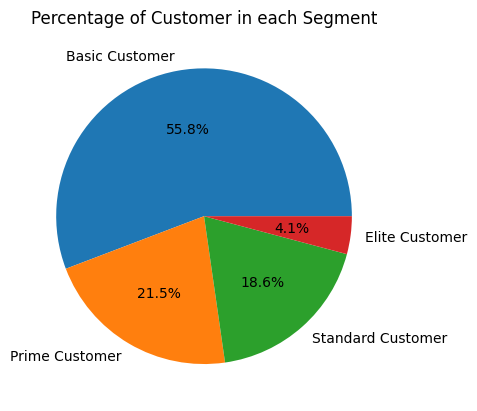

In [65]:
# knowing the percentage of each segment of customers using pie chart
segment_count = RFM['Segment_Label'].value_counts()

plt.pie(segment_count.values, labels= segment_count.index, autopct='%1.1f%%')
plt.title('Percentage of Customer in each Segment')
plt.show()

## Second Part of Data

In [67]:
df_part2 = df.copy()  # creating copy
df_part2['Date'] = pd.to_datetime(df_part2['Date'])  # converting to datetime format
df_part2.set_index('Date', inplace=True)  # setting Date as index
df_part2 = df_part2.sort_index()  # sorting by Date to ensure monotonic index

# Now you can slice the last 3 months
df_part2 = df_part2.loc['2023-01-01':]  # slicing the data
df_part2.reset_index(inplace=True)  # resetting index

In [68]:
# viewing the data of df_part2
df_part2.head()

,Date,InvoiceID,ProductID,TotalSales,Discount,CustomerID,Quantity
0,2023-01-02,12496,909,3616.730697,0.000000,259,2
1,2023-01-02,13568,1013,2565.220339,461.739661,211,1
2,2023-01-02,13571,937,2495.762712,449.237288,231,2
3,2023-01-02,13573,909,5345.898305,962.261695,259,2
4,2023-01-02,13573,910,7765.152542,1397.727458,259,2


## Churn Analysis

In [69]:
# knowing the number of customers in df_part2
df_part2['CustomerID'].nunique()

169

In [70]:
# getting the number of customers in part1 and part2
part1_customer = df_part1['CustomerID'].sort_values().unique()
part2_customer = df_part2['CustomerID'].sort_values().unique()

In [71]:
# finding how many new customers in part2

New_customers = [] # empty list to store new customers ID

for i in part2_customer:
    if i in part1_customer: # checking customer of part2 data in part1 data
        pass

    else:
        New_customers.append(i) # else appending customer ID to New_customers

print(f'Total Number of New Customers: {len(New_customers)}')

Total Number of New Customers: 23


In [72]:
# finding how many old customers made transaction in last three months

R_next_3months = [] # empty list to store customer ID

for i in part1_customer:
    if i in part2_customer: # checking customer of part1 data in part2 data 
        R_next_3months.append('Yes') # if true append Yes

    else:
        R_next_3months.append('No') # else append No
        
RFM['R_Next_3Months'] =  R_next_3months # adding the new feature variable

In [73]:
# viewing RFM dataframe
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months
0,0,15,26,168979.569189,4,4,6,446,14,2,Prime Customer,Yes
1,1,651,13,20476.728814,1,2,3,123,6,4,Basic Customer,No
2,2,113,35,43406.084743,3,4,3,343,10,3,Standard Customer,Yes
3,3,541,1,300.847458,1,1,1,111,3,4,Basic Customer,No
4,4,8,38,60977.720337,4,4,3,443,11,2,Prime Customer,No


In [74]:
# finding whether the customer is churned or not based on conditions

Churn = [] # empty list to store the status of churn of customer

for i,j in enumerate(RFM['CustomerID']):
    
    if RFM['Recency'][i] <= 90 and RFM['R_Next_3Months'][i] == 'Yes': 
        Churn.append('No')
        
    elif RFM['Recency'][i] <= 90 and RFM['R_Next_3Months'][i] == 'No':
        
        if RFM['Frequency'][i] <= 15:
            Churn.append('High Risk')
            
        else:
            Churn.append('Low Risk')
            
    elif RFM['Recency'][i] > 90 and RFM['R_Next_3Months'][i] == 'Yes':
        
        if RFM['Frequency'][i] > 15:
            Churn.append('No')
            
        else:
            Churn.append('Low Risk')
            
    elif RFM['Recency'][i] > 90 and RFM['R_Next_3Months'][i] == 'No':
        Churn.append('Yes')
        
RFM['Churn'] = Churn # adding the new feature variable churn

In [75]:
# viewing RFM dataframe
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Value,RFM_Score,Seg_Num,Segment_Label,R_Next_3Months,Churn
0,0,15,26,168979.569189,4,4,6,446,14,2,Prime Customer,Yes,No
1,1,651,13,20476.728814,1,2,3,123,6,4,Basic Customer,No,Yes
2,2,113,35,43406.084743,3,4,3,343,10,3,Standard Customer,Yes,No
3,3,541,1,300.847458,1,1,1,111,3,4,Basic Customer,No,Yes
4,4,8,38,60977.720337,4,4,3,443,11,2,Prime Customer,No,Low Risk


In [76]:
# getting the counts of different classes in churn
RFM['Churn'].value_counts()

Churn
Yes          287
No           136
Low Risk      31
High Risk     30
Name: count, dtype: int64

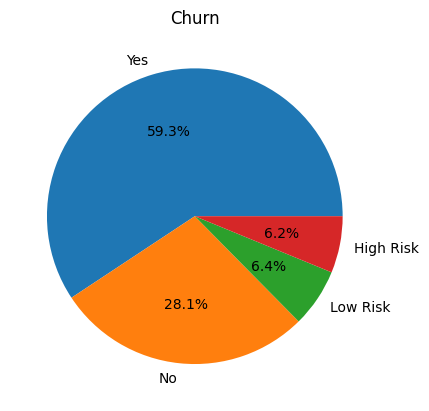

In [77]:
# knowing the percentage of each class in churn using pie chart
churn_count = RFM['Churn'].value_counts()

plt.pie(churn_count.values, labels= churn_count.index, autopct='%1.1f%%')
plt.title('Churn')
plt.show()

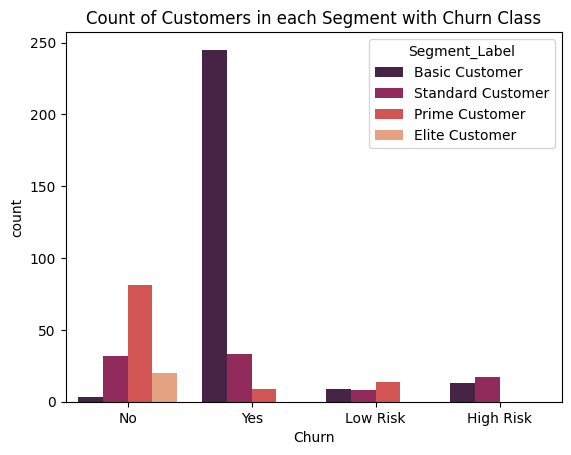

In [78]:
# visualizing different segment of customers and thier churn class
sns.countplot(x= 'Churn', data= RFM, hue= 'Segment_Label', palette= 'rocket')
plt.title('Count of Customers in each Segment with Churn Class')
plt.show()

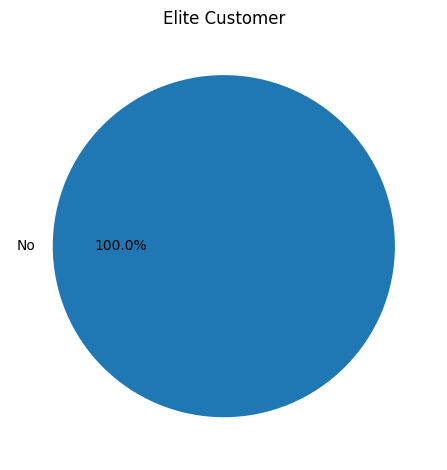

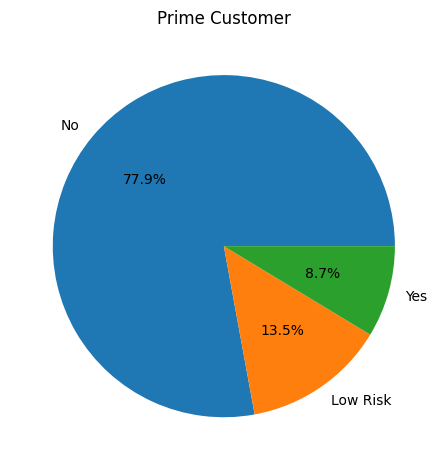

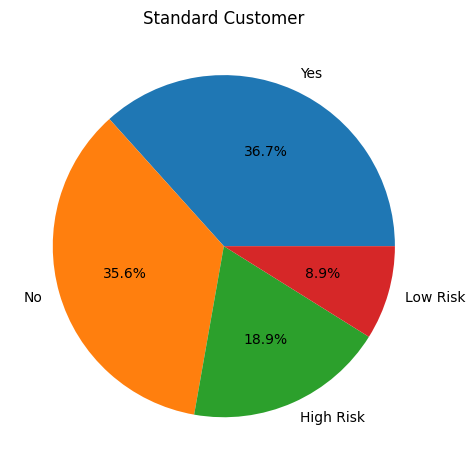

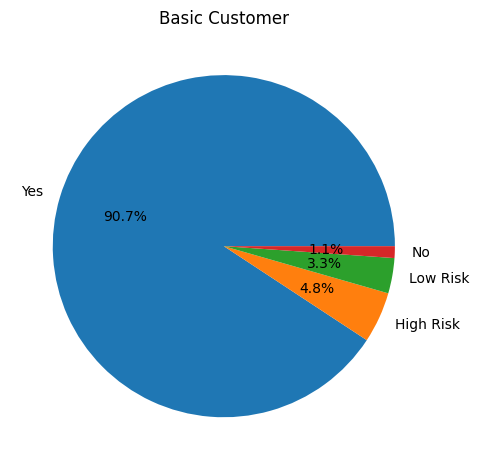

In [79]:
# visualizing and knowing the percentage of churn class for different segment of customers 
segment_list = RFM['Segment_Label'].unique().sort_values(ascending= False)

for i in segment_list:
    segment = RFM[['Segment_Label','Churn']][RFM.Segment_Label == i]
    segment_churn = segment.value_counts().to_frame().reset_index().rename(columns= {0:'count'})
    
    plt.pie(x= segment_churn['count'], labels= segment_churn['Churn'], autopct= '%.1f%%')
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [81]:
# converting the datatype of categorical feature from int to object
RFM[['CustomerID', 'Seg_Num', 'Segment_Label']] = RFM[['CustomerID', 'Seg_Num', 'Segment_Label']].astype(object)

In [85]:
# Selecting only numeric columns for the correlation matrix
numeric_features = RFM.select_dtypes(include=[float, int])
corr = numeric_features.corr()
corr

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Recency,1.000000,-0.239145,-0.340119,-0.838954,-0.504063,-0.590909,-0.654848
Frequency,-0.239145,1.000000,0.800337,0.323972,0.500858,0.519310,0.509558
Monetary,-0.340119,0.800337,1.000000,0.473120,0.661699,0.728426,0.700851
R_Score,-0.838954,0.323972,0.473120,1.000000,0.639466,0.723515,0.805615
F_Score,-0.504063,0.500858,0.661699,0.639466,1.000000,0.877284,0.949152
M_Score,-0.590909,0.519310,0.728426,0.723515,0.877284,1.000000,0.964791
RFM_Score,-0.654848,0.509558,0.700851,0.805615,0.949152,0.964791,1.000000


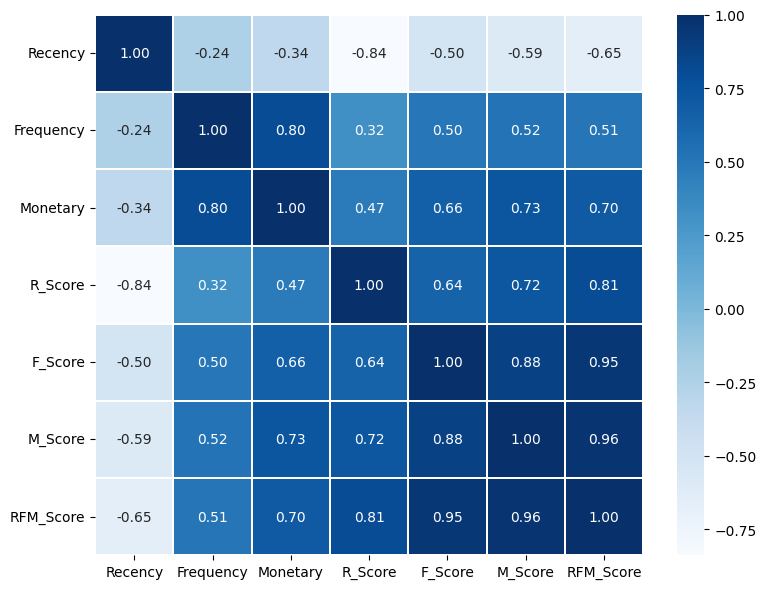

In [86]:
# visualizing the correlation between numeric feature variables using heat map
plt.figure(figsize= (8,6))
sns.heatmap(data= corr, fmt= '.2f', linewidths= 0.2, linecolor= 'white', cmap= 'Blues', annot= True)
plt.tight_layout()
plt.show()

In [88]:
# Selecting only numeric columns to calculate variance
numeric_features = RFM.select_dtypes(include=[float, int])
variance = numeric_features.var()
variance

Recency      2.351515e+05
Frequency    3.768159e+04
Monetary     1.271772e+11
R_Score      1.622983e+00
F_Score      6.456000e+00
M_Score      5.768471e+00
RFM_Score    3.312223e+01
dtype: float64

In [89]:
# dropping unwanted and multicollinearity feature variables
df_segment = RFM.copy() # copy of RFM dataframe
df_segment.drop(['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Value', 'Seg_Num'], axis= 1, inplace= True) # dropping
df_segment.head()

,Recency,Frequency,Monetary,RFM_Score,Segment_Label,R_Next_3Months,Churn
0,15,26,168979.569189,14,Prime Customer,Yes,No
1,651,13,20476.728814,6,Basic Customer,No,Yes
2,113,35,43406.084743,10,Standard Customer,Yes,No
3,541,1,300.847458,3,Basic Customer,No,Yes
4,8,38,60977.720337,11,Prime Customer,No,Low Risk


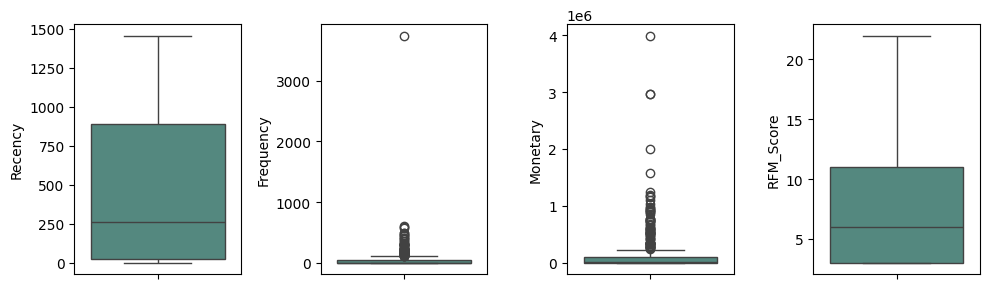

In [90]:
# visualizing and getting know whether independent feature variables having outlier using box plot
num_features = df_segment.select_dtypes(exclude= 'object').columns

fig, axis = plt.subplots(1,4,figsize=(10,3))
axis = axis.flatten()

for i,feature in enumerate(num_features):
    sns.boxplot(y= feature, data= df_segment, ax= axis[i], color= '#4c9085')

plt.tight_layout()
plt.show()

In [91]:
# getting the feature variables having outliers
outliers_features = ['Frequency', 'Monetary']

In [92]:
# removing outliers using zscore 
from scipy import stats
zscore_frequency = np.abs(stats.zscore(df_segment['Frequency'])) # calculating Z-score for frequency
zscore_monetary = np.abs(stats.zscore(df_segment['Monetary'])) # calculating Z-score for monetary

threshold = 3 # setting threshold value

outliers_frequency = list(np.where(zscore_frequency>threshold)[0]) # getting outliers index in frequency
outliers_monetary = list(np.where(zscore_monetary>threshold)[0]) # getting outliers index in monetary

outliers_indices = list(set(outliers_frequency + outliers_monetary)) # creating a set for getting unique index of outliers
outliers_indices.sort() # sorting the list

df_segment = df_segment.drop(df_segment.index[outliers_indices]) # dropping outlier records

In [93]:
# encoding categorical variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_segment['R_Next_3Months'] = labelencoder.fit_transform(df_segment['R_Next_3Months']) 

## Data Splitting

In [94]:
# assigning variables for independent and dependent feature variables

X = df_segment.drop(['Segment_Label', 'Churn'], axis= 1) # independent feature variables
y = df_segment[['Segment_Label', 'Churn']] # dependent feature variables

In [95]:
# standardization of independent variables
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [96]:
# splitting data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

## Model Training and Tuning

In [97]:
# importing Multi-Output Classifier since we have two target variables
from sklearn.multioutput import MultiOutputClassifier

In [98]:
# importing GridSearch CV to find optimal set of hyperparameters
from sklearn.model_selection import GridSearchCV

In [99]:
# importing evaluation metrics of classification model 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

### i.) Logistic Regression

In [100]:
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = MultiOutputClassifier(LogisticRegression())

In [101]:
# setting hyperparameters of logistic regression
logreg_params = {
    'estimator__C': [0.1, 1.0, 10.0],
    'estimator__penalty': ['l1', 'l2']
}

In [102]:
# using gridsearch cv to find optimal set of hyperparameters of logistic regression
logreg_gsearch = GridSearchCV(estimator= logreg, param_grid= logreg_params, cv= 5)

# fitting with training data
logreg_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=LogisticRegression()),
             param_grid={'estimator__C': [0.1, 1.0, 10.0],
                         'estimator__penalty': ['l1', 'l2']})

In [103]:
# getting the best hyperparameters of logistic regression
logreg_gsearch.best_params_

{'estimator__C': 10.0, 'estimator__penalty': 'l2'}

In [104]:
# getting best score
logreg_gsearch.best_score_

0.9553998632946001

In [105]:
# building the logistic regression model with best estimators
logreg_model = logreg_gsearch.best_estimator_

In [106]:
# predicting target variables using test data with logistic regression model
y_logreg_predict = logreg_model.predict(X_test)

In [107]:
# getting the evaluation metrics score of logistic regression model for Segmentation
print('Logistic Regression Model: Segmentation \n')

seg_report_logreg = classification_report(y_test['Segment_Label'], y_logreg_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_logreg}')

seg_CM_logreg = confusion_matrix(y_test['Segment_Label'], y_logreg_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_logreg}\n')

seg_AS_log = round(accuracy_score(y_test['Segment_Label'], y_logreg_predict[:,0])*100,2) # Accuracy Score
seg_PS_log = round(precision_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_log = round(recall_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_log = round(f1_score(y_test['Segment_Label'], y_logreg_predict[:,0], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {seg_AS_log}')
print(f'Precision Score: {seg_PS_log}')
print(f'Recall Score: {seg_RS_log}')
print(f'F1 Score: {seg_F1_log}')

Logistic Regression Model: Segmentation 

Classification Report:
                    precision    recall  f1-score   support

   Basic Customer       1.00      1.00      1.00        51
   Elite Customer       1.00      1.00      1.00         2
   Prime Customer       1.00      0.96      0.98        23
Standard Customer       0.95      1.00      0.98        20

         accuracy                           0.99        96
        macro avg       0.99      0.99      0.99        96
     weighted avg       0.99      0.99      0.99        96

Confusion Matrix:
 [[51  0  0  0]
 [ 0  2  0  0]
 [ 0  0 22  1]
 [ 0  0  0 20]]

Accuracy Sore: 98.96
Precision Score: 99.01
Recall Score: 98.96
F1 Score: 98.96


In [108]:
# getting the evaluation metrics score of logistic regression model for Churn Prediction
print('Logistic Regression Model: Churn Prediction \n')

churn_report_logreg = classification_report(y_test['Churn'], y_logreg_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_logreg}')

churn_CM_logreg = confusion_matrix(y_test['Churn'], y_logreg_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_logreg}\n')

churn_AS_log = round(accuracy_score(y_test['Churn'], y_logreg_predict[:,1])*100,2) # Accuracy Score
churn_PS_log = round(precision_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_log = round(recall_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_log = round(f1_score(y_test['Churn'], y_logreg_predict[:,1], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {churn_AS_log}')
print(f'Precision Score: {churn_PS_log}')
print(f'Recall Score: {churn_RS_log}')
print(f'F1 Score: {churn_F1_log}')

Logistic Regression Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

   High Risk       1.00      0.83      0.91         6
    Low Risk       1.00      0.80      0.89         5
          No       1.00      1.00      1.00        29
         Yes       0.97      1.00      0.98        56

    accuracy                           0.98        96
   macro avg       0.99      0.91      0.95        96
weighted avg       0.98      0.98      0.98        96

Confusion Matrix:
 [[ 5  0  0  1]
 [ 0  4  0  1]
 [ 0  0 29  0]
 [ 0  0  0 56]]

Accuracy Sore: 97.92
Precision Score: 97.99
Recall Score: 97.92
F1 Score: 97.83


### ii.) Random Forest

In [109]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = MultiOutputClassifier(RandomForestClassifier())

In [110]:
# setting hyperparameters of random forest classifier
rf_params = {
    'estimator__criterion':['gini','entropy'],
    'estimator__n_estimators':[100,200],
    'estimator__max_depth':[None,5,10],
    'estimator__max_features':[None,'sqrt','log2'],
}

In [111]:
# using gridsearch cv to find optimal set of hyperparameters of random forest classifier
rf_gsearch = GridSearchCV(estimator= rf, param_grid= rf_params, cv= 5)

# fitting with training data
rf_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__criterion': ['gini', 'entropy'],
                         'estimator__max_depth': [None, 5, 10],
                         'estimator__max_features': [None, 'sqrt', 'log2'],
                         'estimator__n_estimators': [100, 200]})

In [112]:
# getting the best hyperparameters of random forest classifier
rf_gsearch.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__n_estimators': 200}

In [113]:
# getting best score
rf_gsearch.best_score_

0.9973684210526315

In [114]:
# building the random forest classifier model with best estimators
rf_model = rf_gsearch.best_estimator_

In [115]:
# predicting target variables using test data with random forest classifier model
y_rf_predict = rf_model.predict(X_test)

In [116]:
# getting the evaluation metrics score of random forest classifier model for Segmentation
print('Random Forest Classifier Model: Segmentation \n')

seg_report_rf = classification_report(y_test['Segment_Label'], y_rf_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_rf}')

seg_CM_rf = confusion_matrix(y_test['Segment_Label'], y_rf_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_rf}\n')

seg_AS_rf = round(accuracy_score(y_test['Segment_Label'], y_rf_predict[:,0])*100,2) # Accuracy Score
seg_PS_rf = round(precision_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_rf = round(recall_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_rf = round(f1_score(y_test['Segment_Label'], y_rf_predict[:,0], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {seg_AS_rf}')
print(f'Precision Score: {seg_PS_rf}')
print(f'Recall Score: {seg_RS_rf}')
print(f'F1 Score: {seg_F1_rf}')

Random Forest Classifier Model: Segmentation 

Classification Report:
                    precision    recall  f1-score   support

   Basic Customer       1.00      1.00      1.00        51
   Elite Customer       1.00      1.00      1.00         2
   Prime Customer       1.00      1.00      1.00        23
Standard Customer       1.00      1.00      1.00        20

         accuracy                           1.00        96
        macro avg       1.00      1.00      1.00        96
     weighted avg       1.00      1.00      1.00        96

Confusion Matrix:
 [[51  0  0  0]
 [ 0  2  0  0]
 [ 0  0 23  0]
 [ 0  0  0 20]]

Accuracy Sore: 100.0
Precision Score: 100.0
Recall Score: 100.0
F1 Score: 100.0


In [117]:
# getting the evaluation metrics score of random forest classifier model for Churn Prediction
print('Random Forest Classifier Model: Churn Prediction \n')

churn_report_rf = classification_report(y_test['Churn'], y_rf_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_rf}')

churn_CM_rf = confusion_matrix(y_test['Churn'], y_rf_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_rf}\n')

churn_AS_rf = round(accuracy_score(y_test['Churn'], y_rf_predict[:,1])*100,2) # Accuracy Score
churn_PS_rf = round(precision_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_rf = round(recall_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_rf = round(f1_score(y_test['Churn'], y_rf_predict[:,1], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {churn_AS_rf}')
print(f'Precision Score: {churn_PS_rf}')
print(f'Recall Score: {churn_RS_rf}')
print(f'F1 Score: {churn_F1_rf}')

Random Forest Classifier Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

   High Risk       1.00      0.83      0.91         6
    Low Risk       0.83      1.00      0.91         5
          No       1.00      0.97      0.98        29
         Yes       0.98      1.00      0.99        56

    accuracy                           0.98        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.98      0.98      0.98        96

Confusion Matrix:
 [[ 5  0  0  1]
 [ 0  5  0  0]
 [ 0  1 28  0]
 [ 0  0  0 56]]

Accuracy Sore: 97.92
Precision Score: 98.11
Recall Score: 97.92
F1 Score: 97.91


### iii.) K-Nearest Neighbor

In [118]:
# importing K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = MultiOutputClassifier(KNeighborsClassifier())

In [119]:
# setting hyperparameters of KNN Classifier
knn_params = {
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

In [120]:
# using gridsearch cv to find optimal set of hyperparameters of KNN classifier
knn_gsearch = GridSearchCV(estimator= knn, param_grid= knn_params, cv= 5)

# fitting with training data
knn_gsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=KNeighborsClassifier()),
             param_grid={'estimator__metric': ['euclidean', 'manhattan'],
                         'estimator__n_neighbors': [3, 5, 7],
                         'estimator__weights': ['uniform', 'distance']})

In [121]:
# getting the best hyperparameters of KNN classifier
knn_gsearch.best_params_

{'estimator__metric': 'manhattan',
 'estimator__n_neighbors': 3,
 'estimator__weights': 'distance'}

In [122]:
# getting best score
knn_gsearch.best_score_

0.9606971975393028

In [124]:
# building the KNN classifier model with best estimators
knn_model = knn_gsearch.best_estimator_

In [125]:
# predicting target variables using test data with KNN classifier model
y_knn_predict = knn_model.predict(X_test)

In [126]:
# getting the evaluation metrics score of KNN classifier model for Segmentation
print('K Nearest Neighbor Classifier Model: Segmentation \n')

seg_report_knn = classification_report(y_test['Segment_Label'], y_knn_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_knn}')

seg_CM_knn = confusion_matrix(y_test['Segment_Label'], y_knn_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_knn}\n')

seg_AS_knn = round(accuracy_score(y_test['Segment_Label'], y_knn_predict[:,0])*100,2) # Accuracy Score
seg_PS_knn = round(precision_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_knn = round(recall_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_knn = round(f1_score(y_test['Segment_Label'], y_knn_predict[:,0], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {seg_AS_knn}')
print(f'Precision Score: {seg_PS_knn}')
print(f'Recall Score: {seg_RS_knn}')
print(f'F1 Score: {seg_F1_knn}')

K Nearest Neighbor Classifier Model: Segmentation 

Classification Report:
                    precision    recall  f1-score   support

   Basic Customer       1.00      1.00      1.00        51
   Elite Customer       1.00      1.00      1.00         2
   Prime Customer       1.00      1.00      1.00        23
Standard Customer       1.00      1.00      1.00        20

         accuracy                           1.00        96
        macro avg       1.00      1.00      1.00        96
     weighted avg       1.00      1.00      1.00        96

Confusion Matrix:
 [[51  0  0  0]
 [ 0  2  0  0]
 [ 0  0 23  0]
 [ 0  0  0 20]]

Accuracy Sore: 100.0
Precision Score: 100.0
Recall Score: 100.0
F1 Score: 100.0


In [127]:
# getting the evaluation metrics score of KNN classifier model for Churn Prediction
print('K Nearest Neighbor Classifier Model: Churn Prediction \n')

churn_report_knn = classification_report(y_test['Churn'], y_knn_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_knn}')

churn_CM_knn = confusion_matrix(y_test['Churn'], y_knn_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_knn}\n')

churn_AS_knn = round(accuracy_score(y_test['Churn'], y_knn_predict[:,1])*100,2) # Accuracy Score
churn_PS_knn = round(precision_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_knn = round(recall_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_knn = round(f1_score(y_test['Churn'], y_knn_predict[:,1], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {churn_AS_knn}')
print(f'Precision Score: {churn_PS_knn}')
print(f'Recall Score: {churn_RS_knn}')
print(f'F1 Score: {churn_F1_knn}')

K Nearest Neighbor Classifier Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

   High Risk       0.83      0.83      0.83         6
    Low Risk       1.00      1.00      1.00         5
          No       1.00      1.00      1.00        29
         Yes       0.98      0.98      0.98        56

    accuracy                           0.98        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.98      0.98      0.98        96

Confusion Matrix:
 [[ 5  0  0  1]
 [ 0  5  0  0]
 [ 0  0 29  0]
 [ 1  0  0 55]]

Accuracy Sore: 97.92
Precision Score: 97.92
Recall Score: 97.92
F1 Score: 97.92


### iv.) Naive Bayes

In [128]:
# importing Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultiOutputClassifier(MultinomialNB())

In [129]:
# setting hyperparameters of multinomial naive bayes
mnb_params = {
    'estimator__alpha': [0.1, 0.5, 1.0],
    'estimator__fit_prior': [True, False]
}

In [130]:
# using gridsearch cv to find optimal set of hyperparameters of multinomial naive bayes
mnb_gsearch = GridSearchCV(estimator= mnb, param_grid= mnb_params, cv= 5)

# fitting with training data
mnb_gsearch.fit(abs(X_train), y_train)

GridSearchCV(cv=5, estimator=MultiOutputClassifier(estimator=MultinomialNB()),
             param_grid={'estimator__alpha': [0.1, 0.5, 1.0],
                         'estimator__fit_prior': [True, False]})

In [131]:
# getting the best hyperparameters of multinomial naive bayes
mnb_gsearch.best_params_

{'estimator__alpha': 0.1, 'estimator__fit_prior': True}

In [132]:
# getting best score
mnb_gsearch.best_score_

0.5313397129186603

In [133]:
# building the multinomial naive bayes model with best estimators
mnb_model = mnb_gsearch.best_estimator_

In [134]:
# predicting target variables using test data with multinomial naive bayes model
y_mnb_predict = mnb_model.predict(X_test)

In [135]:
# getting the evaluation metrics score of multinomial naive bayes model for Segmentation
print('Multinomial Naive Bayes Model: Segmentation \n')

seg_report_mnb = classification_report(y_test['Segment_Label'], y_mnb_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_mnb}')

seg_CM_mnb = confusion_matrix(y_test['Segment_Label'], y_mnb_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_mnb}\n')

seg_AS_mnb = round(accuracy_score(y_test['Segment_Label'], y_mnb_predict[:,0])*100,2) # Accuracy Score
seg_PS_mnb = round(precision_score(y_test['Segment_Label'], y_mnb_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_mnb = round(recall_score(y_test['Segment_Label'], y_mnb_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_mnb = round(f1_score(y_test['Segment_Label'], y_mnb_predict[:,0], average="weighted")*100,2)  # F1 Score
  
print(f'Accuracy Sore: {seg_AS_mnb}')
print(f'Precision Score: {seg_PS_mnb}')
print(f'Recall Score: {seg_RS_mnb}')
print(f'F1 Score: {seg_F1_mnb}')

Multinomial Naive Bayes Model: Segmentation 

Classification Report:
                    precision    recall  f1-score   support

   Basic Customer       0.64      1.00      0.78        51
   Elite Customer       0.50      1.00      0.67         2
   Prime Customer       1.00      0.52      0.69        23
Standard Customer       0.00      0.00      0.00        20

         accuracy                           0.68        96
        macro avg       0.53      0.63      0.53        96
     weighted avg       0.59      0.68      0.59        96

Confusion Matrix:
 [[51  0  0  0]
 [ 0  2  0  0]
 [ 9  2 12  0]
 [20  0  0  0]]

Accuracy Sore: 67.71
Precision Score: 58.87
Recall Score: 67.71
F1 Score: 59.18


In [136]:
# getting the evaluation metrics score of multinomial naive bayes model for Churn Prediction
print('Multinomial Naive Bayes Model: Churn Prediction \n')

churn_report_mnb = classification_report(y_test['Churn'], y_mnb_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_mnb}')

churn_CM_mnb = confusion_matrix(y_test['Churn'], y_mnb_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_mnb}\n')

churn_AS_mnb = round(accuracy_score(y_test['Churn'], y_mnb_predict[:,1])*100,2) # Accuracy Score
churn_PS_mnb = round(precision_score(y_test['Churn'], y_mnb_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_mnb = round(recall_score(y_test['Churn'], y_mnb_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_mnb = round(f1_score(y_test['Churn'], y_mnb_predict[:,1], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {churn_AS_mnb}')
print(f'Precision Score: {churn_PS_mnb}')
print(f'Recall Score: {churn_RS_mnb}')
print(f'F1 Score: {churn_F1_mnb}')

Multinomial Naive Bayes Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

   High Risk       0.00      0.00      0.00         6
    Low Risk       0.00      0.00      0.00         5
          No       1.00      0.62      0.77        29
         Yes       0.72      1.00      0.84        56

    accuracy                           0.77        96
   macro avg       0.43      0.41      0.40        96
weighted avg       0.72      0.77      0.72        96

Confusion Matrix:
 [[ 0  0  0  6]
 [ 0  0  0  5]
 [ 0  0 18 11]
 [ 0  0  0 56]]

Accuracy Sore: 77.08
Precision Score: 72.09
Recall Score: 77.08
F1 Score: 71.89


### v.) Support Vector Machine

In [137]:
# importing Support Vector Classifier
from sklearn.svm import SVC
svc = MultiOutputClassifier(SVC())

In [138]:
# setting hyperparameters of support vector classifier
svc_params = {
    'estimator__kernel':['linear','rbf','poly']
}

In [139]:
# using grid search cv to find optimal set of hyperparameters of support vector classifier
svc_gsearch = GridSearchCV(estimator= svc , param_grid= svc_params, cv= 5)

# fitting with training data
svc_gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MultiOutputClassifier(estimator=SVC()),
             param_grid={'estimator__kernel': ['linear', 'rbf', 'poly']})

In [140]:
# getting the best hyperparameters of support vector classifier
svc_gsearch.best_params_

{'estimator__kernel': 'linear'}

In [141]:
# getting best score
svc_gsearch.best_score_

0.9238892686261106

In [142]:
# building the support vector classifier model with best estimators
svc_model = svc_gsearch.best_estimator_

In [143]:
# predicting target variables using test data with support vector classifier model
y_svc_predict = svc_model.predict(X_test)

In [144]:
# getting the evaluation metrics score of support vector classifier model for Segmentation
print('Support Vector Classifier Model: Segmentation \n')

seg_report_svc = classification_report(y_test['Segment_Label'], y_svc_predict[:,0]) # Classification Report
print(f'Classification Report:\n {seg_report_svc}')

seg_CM_svc = confusion_matrix(y_test['Segment_Label'], y_svc_predict[:,0]) # Confusion Matrix
print(f'Confusion Matrix:\n {seg_CM_svc}\n')

seg_AS_svc = round(accuracy_score(y_test['Segment_Label'], y_svc_predict[:,0])*100,2) # Accuracy Score
seg_PS_svc = round(precision_score(y_test['Segment_Label'], y_svc_predict[:,0], average="weighted")*100,2) # Precision Score
seg_RS_svc = round(recall_score(y_test['Segment_Label'], y_svc_predict[:,0], average="weighted")*100,2) # Recall Score
seg_F1_svc = round(f1_score(y_test['Segment_Label'], y_svc_predict[:,0], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {seg_AS_svc}')
print(f'Precision Score: {seg_PS_svc}')
print(f'Recall Score: {seg_RS_svc}')
print(f'F1 Score: {seg_F1_svc}')

Support Vector Classifier Model: Segmentation 

Classification Report:
                    precision    recall  f1-score   support

   Basic Customer       1.00      1.00      1.00        51
   Elite Customer       1.00      1.00      1.00         2
   Prime Customer       1.00      0.96      0.98        23
Standard Customer       0.95      1.00      0.98        20

         accuracy                           0.99        96
        macro avg       0.99      0.99      0.99        96
     weighted avg       0.99      0.99      0.99        96

Confusion Matrix:
 [[51  0  0  0]
 [ 0  2  0  0]
 [ 0  0 22  1]
 [ 0  0  0 20]]

Accuracy Sore: 98.96
Precision Score: 99.01
Recall Score: 98.96
F1 Score: 98.96


In [145]:
# getting the evaluation metrics score of support vector classifier model for Churn Prediction
print('Support Vector Classifier Model: Churn Prediction \n')

churn_report_svc = classification_report(y_test['Churn'], y_svc_predict[:,1]) # Classification Report
print(f'Classification Report:\n {churn_report_svc}')

churn_CM_svc = confusion_matrix(y_test['Churn'], y_svc_predict[:,1]) # Confusion Matrix
print(f'Confusion Matrix:\n {churn_CM_svc}\n')

churn_AS_svc = round(accuracy_score(y_test['Churn'], y_svc_predict[:,1])*100,2) # Accuracy Score
churn_PS_svc = round(precision_score(y_test['Churn'], y_svc_predict[:,1], average="weighted")*100,2) # Precision Score
churn_RS_svc = round(recall_score(y_test['Churn'], y_svc_predict[:,1], average="weighted")*100,2) # Recall Score
churn_F1_svc = round(f1_score(y_test['Churn'], y_svc_predict[:,1], average="weighted")*100,2) # F1 Score
  
print(f'Accuracy Sore: {churn_AS_svc}')
print(f'Precision Score: {churn_PS_svc}')
print(f'Recall Score: {churn_RS_svc}')
print(f'F1 Score: {churn_F1_svc}')

Support Vector Classifier Model: Churn Prediction 

Classification Report:
               precision    recall  f1-score   support

   High Risk       1.00      0.67      0.80         6
    Low Risk       1.00      0.80      0.89         5
          No       1.00      1.00      1.00        29
         Yes       0.95      1.00      0.97        56

    accuracy                           0.97        96
   macro avg       0.99      0.87      0.92        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
 [[ 4  0  0  2]
 [ 0  4  0  1]
 [ 0  0 29  0]
 [ 0  0  0 56]]

Accuracy Sore: 96.88
Precision Score: 97.03
Recall Score: 96.88
F1 Score: 96.65


## Model Evaluation

In [146]:
# creating a table with segmentation evaluation metrics score of different machine learning models

seg_metrics_dict = {'Models': ['Logistic Reggression', 'Random Forest Classifier', 'K Nearest Neighbor Classifier', 'Naive Bayes', 'Support Vector Classifier'],
                    'Seg_Accuracy Score': [seg_AS_log, seg_AS_rf, seg_AS_knn, seg_AS_mnb, seg_AS_svc],'Seg_Precision Score': [seg_PS_log, seg_PS_rf, seg_PS_knn, seg_PS_mnb, seg_PS_svc],
                    'Seg_Recall Score': [seg_RS_log, seg_RS_rf, seg_RS_knn, seg_RS_mnb, seg_RS_svc],
                    'Seg_F1 Score': [seg_F1_log, seg_F1_rf, seg_F1_knn, seg_F1_mnb, seg_F1_svc]}

seg_metrics_df = pd.DataFrame(seg_metrics_dict)
seg_metrics_df

,Models,Seg_Accuracy Score,Seg_Precision Score,Seg_Recall Score,Seg_F1 Score
0,Logistic Reggression,98.96,99.01,98.96,98.96
1,Random Forest Classifier,100.00,100.00,100.00,100.00
2,K Nearest Neighbor Classifier,100.00,100.00,100.00,100.00
3,Naive Bayes,67.71,58.87,67.71,59.18
4,Support Vector Classifier,98.96,99.01,98.96,98.96


In [147]:
# creating a table with churn prediction evaluation metrics score of different machine learning models

churn_metrics_dict = {'Models': ['Logistic Reggression', 'Random Forest Classifier', 'K Nearest Neighbor Classifier', 'Naive Bayes', 'Support Vector Classifier'],
               'Churn_Accuracy Score': [churn_AS_log, churn_AS_rf, churn_AS_knn, churn_AS_mnb, churn_AS_svc],
               'Churn_Precision Score': [churn_PS_log, churn_PS_rf, churn_PS_knn, churn_PS_mnb, churn_PS_svc],
               'Churn_Recall Score': [churn_RS_log, churn_RS_rf, churn_RS_knn, churn_RS_mnb, churn_RS_svc],
               'Churn_F1 Score': [churn_F1_log, churn_F1_rf, churn_F1_knn, churn_F1_mnb, churn_F1_svc]}

churn_metrics_df = pd.DataFrame(churn_metrics_dict)
churn_metrics_df

,Models,Churn_Accuracy Score,Churn_Precision Score,Churn_Recall Score,Churn_F1 Score
0,Logistic Reggression,97.92,97.99,97.92,97.83
1,Random Forest Classifier,97.92,98.11,97.92,97.91
2,K Nearest Neighbor Classifier,97.92,97.92,97.92,97.92
3,Naive Bayes,77.08,72.09,77.08,71.89
4,Support Vector Classifier,96.88,97.03,96.88,96.65


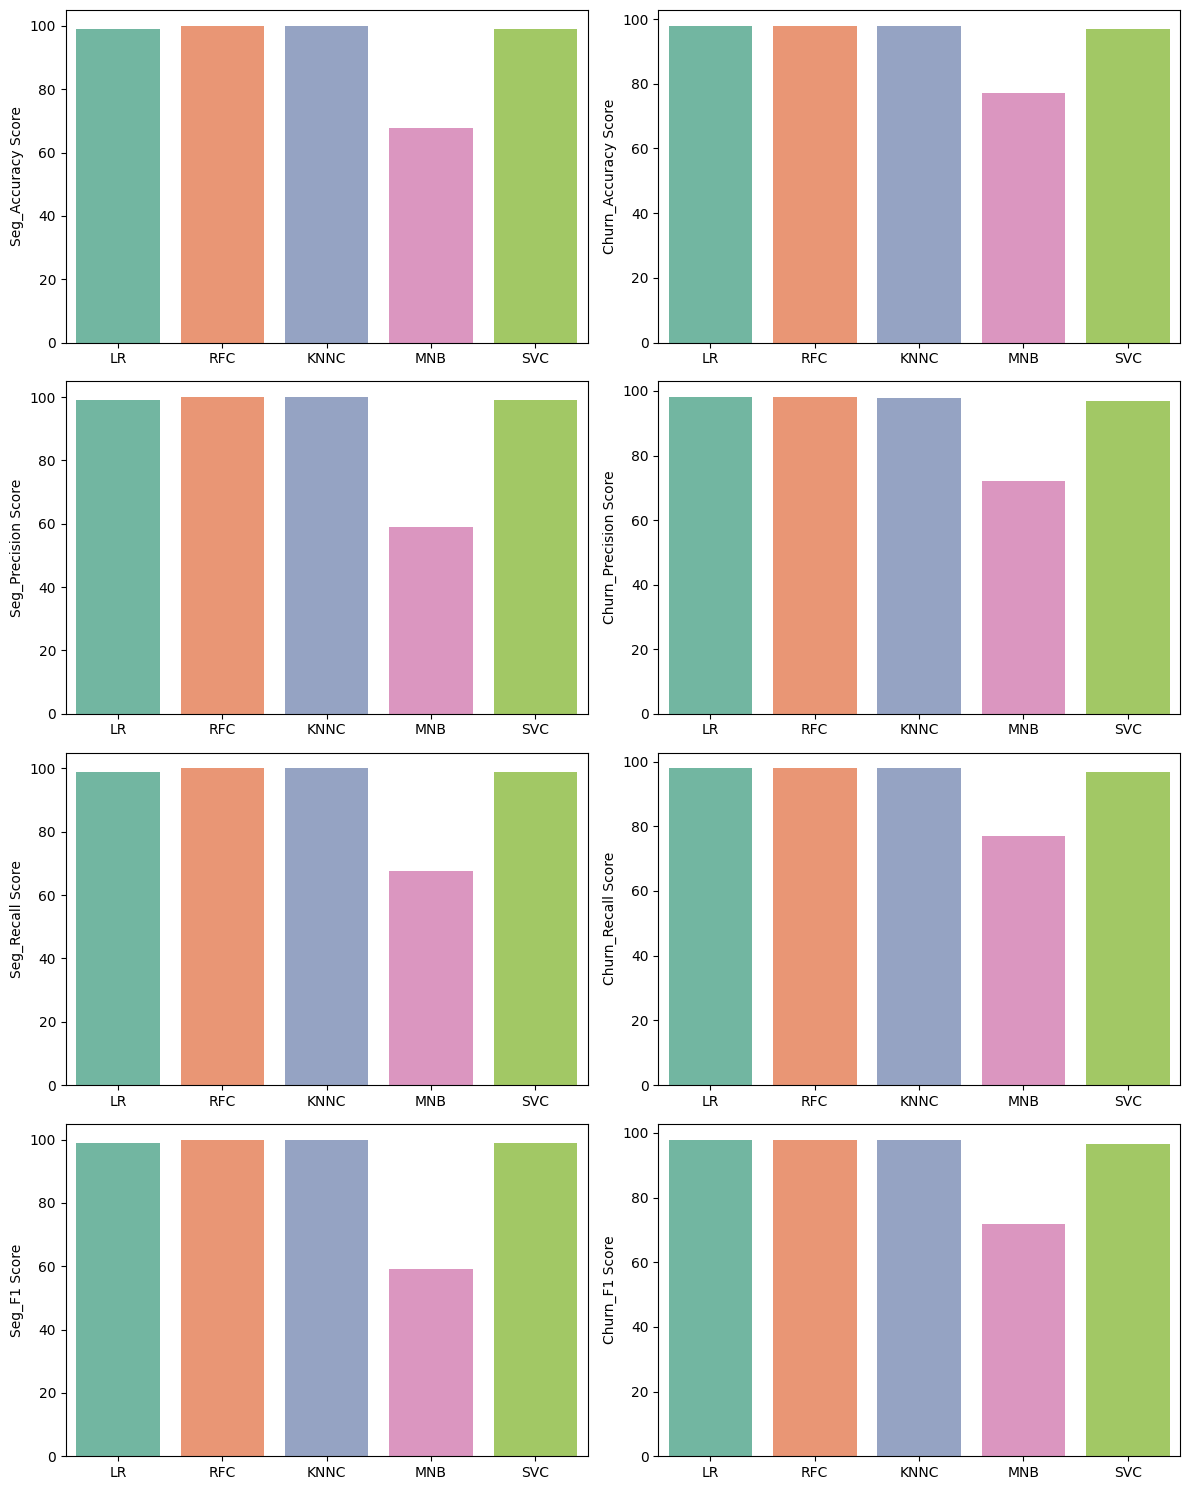

In [148]:
# visualizing and comparing evaluation metrics of different machine learning models
fig, axis = plt.subplots(4,2, figsize= (12,15))
axis = axis.flatten()

seg_metrics = ['Seg_Accuracy Score', 'Seg_Precision Score', 'Seg_Recall Score', 'Seg_F1 Score']
churn_metrics = ['Churn_Accuracy Score', 'Churn_Precision Score', 'Churn_Recall Score', 'Churn_F1 Score']
models = ['LR', 'RFC', 'KNNC', 'MNB', 'SVC']
prediction = ['Segmentation', 'Churn']

i=0
for seg_column in seg_metrics:
    sns.barplot(x= models, y= seg_column, data= seg_metrics_df, palette= 'Set2', ax= axis[i])
    i+=2

j=1
for churn_column in churn_metrics:
    sns.barplot(x= models, y= churn_column, data= churn_metrics_df, palette= 'Set2', ax= axis[j])
    j+=2

plt.tight_layout()
plt.show()

### The dataset is imbalanced, so will consider F1 Score for the model evaluation

### After evaluating multiple machine learning models, the Random Forest Classifier exhibited 100% F1 Score in customer segmentation and 99% F1 Score in churn prediction.